In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load dataset
dataset_path = "manhole_flood_dataset.csv"
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("✅ Dataset Loaded:")
print(df.head())


✅ Dataset Loaded:
   debris_level  water_level  methane_ppm  h2s_ppm  co_ppm  flood_status
0           112          218          126       58       8             1
1           102           23          123       76      79             1
2            24           18          118       27      95             1
3           116           49           14       53      94             1
4            81          246          144       42      20             1


In [5]:
# Features (independent variables)
X = df.drop('flood_status', axis=1)  # Removing the target column

# Target (dependent variable)
y = df['flood_status']  # 0 = No Flood, 1 = Flood


In [6]:
from sklearn.model_selection import train_test_split

# 70% training data, 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"✅ Training Samples: {X_train.shape[0]}")
print(f"✅ Testing Samples: {X_test.shape[0]}")


✅ Training Samples: 700
✅ Testing Samples: 300


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("✅ Model Training Complete!")


✅ Model Training Complete!


In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n🔍 Confusion Matrix:")
print(conf_matrix)


✅ Model Accuracy: 0.99

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.99      1.00      0.99       271

    accuracy                           0.99       300
   macro avg       0.99      0.95      0.97       300
weighted avg       0.99      0.99      0.99       300


🔍 Confusion Matrix:
[[ 26   3]
 [  0 271]]


C:\Users\Sneha\AppData\Local\Temp\ipykernel_27576\2067283195.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


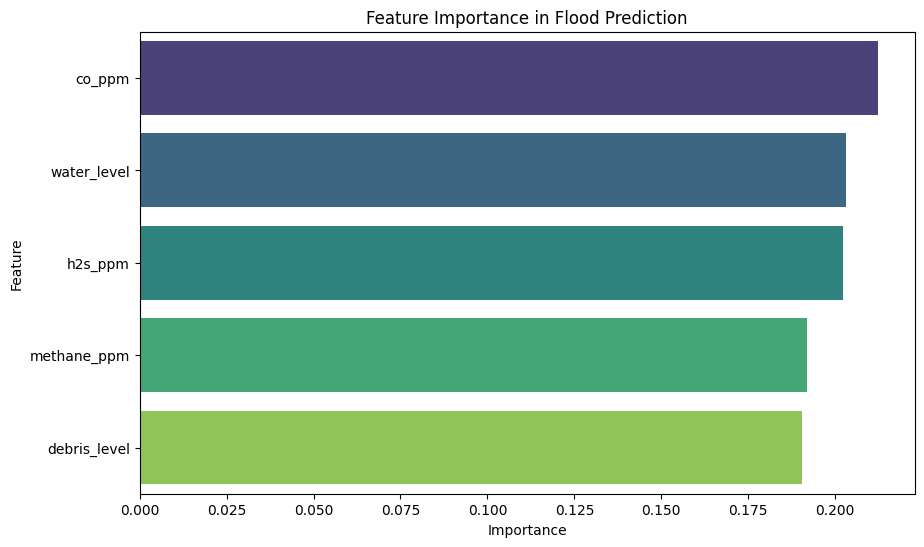

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance in Flood Prediction')
plt.show()


In [12]:
import joblib

# Save the trained model
joblib.dump(rf_model, "flood_model.pkl")

print("✅ Model saved as 'flood_model.pkl'")


✅ Model saved as 'flood_model.pkl'


In [13]:
# Load the trained model
rf_model = joblib.load("flood_model.pkl")

# Example input (Debris Level: 50, Water Level: 120, Methane: 70, H2S: 25, CO: 40)
sample_data = [[50, 120, 70, 25, 40]]  # Format should match dataset features

# Predict flood risk
prediction = rf_model.predict(sample_data)[0]
probability = rf_model.predict_proba(sample_data)[0][1]

# Display result
if prediction == 1:
    print(f"🌊 Flood Risk Detected! Probability: {probability*100:.2f}%")
else:
    print(f"✅ No Flood Risk. Probability: {(1-probability)*100:.2f}%")


✅ No Flood Risk. Probability: 96.50%


c:\Users\Sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
